In [46]:
import pandas as pd
import statsmodels.api as sm
import datetime
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot
df = pd.read_csv("dataset/train.csv", sep=',', parse_dates=[2])

df = df[df['Store'] == 1.0][df['Date']>datetime.date(2013,1,6)].sort_values(by='Date')
df = df[df['DayOfWeek'] != 7]
df.head(10)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1009405,1,1,2013-01-07,7176,785,1,1,0,1
1008290,1,2,2013-01-08,5580,654,1,1,0,1
1007175,1,3,2013-01-09,5471,626,1,1,0,1
1006060,1,4,2013-01-10,4892,615,1,1,0,1
1004945,1,5,2013-01-11,4881,592,1,1,0,1
1003830,1,6,2013-01-12,4952,646,1,0,0,0
1001600,1,1,2013-01-14,4717,616,1,0,0,0
1000485,1,2,2013-01-15,3900,512,1,0,0,0
999370,1,3,2013-01-16,4008,530,1,0,0,0
998255,1,4,2013-01-17,4044,503,1,0,0,0


In [47]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,803.0,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,1.0,3.496887,4604.625156,545.483188,0.967621,0.448319,0.209215
std,0.0,1.707670,1305.943349,135.961270,0.177114,0.497632,0.407002
min,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,2.000000,3935.000000,495.000000,1.000000,0.000000,0.000000
50%,1.0,3.000000,4602.000000,546.000000,1.000000,0.000000,0.000000
75%,1.0,5.000000,5327.000000,608.000000,1.000000,1.000000,0.000000
max,1.0,6.000000,9528.000000,1130.000000,1.000000,1.000000,1.000000


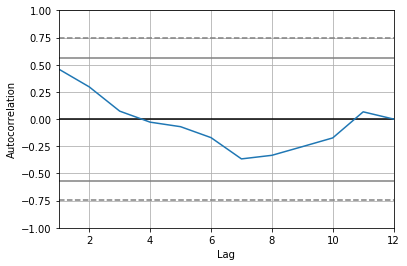

In [48]:
autocorrelation_plot(df['Sales'].head(12))

In [50]:

'''
We see that -1, -2, -3 and -4th weeks' Mondays have a correlation with this week's Monday.
'''
df['SalesMinus1'] = df['Sales'].shift(1)
df['SalesMinus2'] = df['Sales'].shift(2)
df['CustomersMinus1'] = df['Customers'].shift(1)
df['CustomersMinus2'] = df['Customers'].shift(2)
df = df.dropna()
df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesMinus1,SalesMinus2,CustomersMinus1,CustomersMinus2
1004945,1,5,2013-01-11,4881,592,1,1,0,1,4892.0,5471.0,615.0,626.0
1003830,1,6,2013-01-12,4952,646,1,0,0,0,4881.0,4892.0,592.0,615.0
1001600,1,1,2013-01-14,4717,616,1,0,0,0,4952.0,4881.0,646.0,592.0
1000485,1,2,2013-01-15,3900,512,1,0,0,0,4717.0,4952.0,616.0,646.0
999370,1,3,2013-01-16,4008,530,1,0,0,0,3900.0,4717.0,512.0,616.0
998255,1,4,2013-01-17,4044,503,1,0,0,0,4008.0,3900.0,530.0,512.0
997140,1,5,2013-01-18,4127,568,1,0,0,0,4044.0,4008.0,503.0,530.0
996025,1,6,2013-01-19,5182,688,1,0,0,0,4127.0,4044.0,568.0,503.0
993795,1,1,2013-01-21,5394,607,1,1,0,0,5182.0,4127.0,688.0,568.0
992680,1,2,2013-01-22,5720,667,1,1,0,0,5394.0,5182.0,607.0,688.0


In [51]:
df.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,SalesMinus1,SalesMinus2,CustomersMinus1,CustomersMinus2
Store,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DayOfWeek,NaN,1.000000,-0.028940,0.029665,0.008463,-0.260526,-0.044112,-0.183824,-0.144522,-0.195532,-0.158593
Sales,NaN,-0.028940,1.000000,0.958174,0.646605,0.376005,-0.069468,0.302797,0.233250,0.246195,0.211526
Customers,NaN,0.029665,0.958174,1.000000,0.735595,0.208683,-0.097701,0.242944,0.193174,0.224564,0.195677
Open,NaN,0.008463,0.646605,0.735595,1.000000,0.022487,-0.116373,-0.020200,-0.039659,-0.000244,-0.009036
Promo,NaN,-0.260526,0.376005,0.208683,0.022487,1.000000,0.012024,0.397867,0.348295,0.272984,0.258941
SchoolHoliday,NaN,-0.044112,-0.069468,-0.097701,-0.116373,0.012024,1.000000,-0.027076,-0.016954,-0.052738,-0.046169
SalesMinus1,NaN,-0.183824,0.302797,0.242944,-0.020200,0.397867,-0.027076,1.000000,0.302754,0.958241,0.246335
SalesMinus2,NaN,-0.144522,0.233250,0.193174,-0.039659,0.348295,-0.016954,0.302754,1.000000,0.243255,0.958318
CustomersMinus1,NaN,-0.195532,0.246195,0.224564,-0.000244,0.272984,-0.052738,0.958241,0.243255,1.000000,0.224861
